In [84]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## binomial and multinomial distributions ##

Draw samples from a binomial distribution.

random.binomial(n, p, size=None)

Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. 

https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html


In [85]:
np.random.binomial(100, 0.26)

22

In [86]:
np.random.binomial(100, 0.26)

27

Draw samples from a multinomial distribution.

random.multinomial(n, pvals, size=None)

The multinomial distribution is a multivariate generalization of the binomial distribution. Take an experiment with one of p possible outcomes. An example of such an experiment is throwing a dice, where the outcome can be 1 through 6. Each sample drawn from the distribution represents n such experiments. Its values, X_i = [X_0, X_1, ..., X_p], represent the number of times the outcome was i.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html


In [87]:
np.random.multinomial(100, [0.5, 0.5])

array([41, 59])

In [88]:
np.random.multinomial(100, [0.26, 0.74],10)

array([[33, 67],
       [29, 71],
       [27, 73],
       [19, 81],
       [24, 76],
       [24, 76],
       [25, 75],
       [21, 79],
       [27, 73],
       [29, 71]])

In [89]:
np.random.multinomial(100, [0.26, 0.34, 0.40])

array([23, 39, 38])

In [90]:
np.random.multinomial(100, [0.26, 0.34, 0.40],10)

array([[35, 31, 34],
       [36, 31, 33],
       [28, 33, 39],
       [28, 32, 40],
       [25, 39, 36],
       [25, 32, 43],
       [31, 33, 36],
       [27, 28, 45],
       [30, 30, 40],
       [29, 34, 37]])

## Swain vs. Alabama ##

In [92]:
eligible_population = np.array([0.26, 0.74])

In [95]:
np.random.multinomial(100, [0.26, 0.74])

array([36, 64])

In [96]:
# statistic: number of black men among random sample of 100 men from eligible population

np.random.multinomial(100, eligible_population)[0]


28

In [97]:
# Simulation

counts = np.array([])

for i in np.arange(10000):
    new_count = np.random.multinomial(100, eligible_population)[0]
    counts = np.append(counts, new_count)

In [99]:
counts

array([31., 31., 28., ..., 23., 26., 30.])

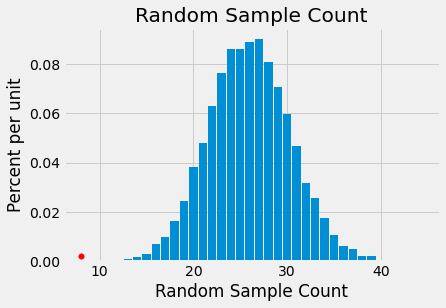

In [100]:
# Visualization
# Don't worry about how the red dot is drawn. It was just drawn to show the statistic of the observed data (observed test statistic) 

pd.DataFrame({'Random Sample Count': counts}).hist(bins = np.arange(9.5, 45, 1), density=True, rwidth=0.9)
plt.ylabel("Percent per unit")
plt.xlabel("Random Sample Count")

observed_count = 8
plt.scatter(observed_count, 0.002, color='red', s=30);
plt.show()

In [45]:
# p-value calculation
# P-value is very low so we can reject the null hypothesis and accept the alternative. Result is highly statistically significant 
sum(counts <= observed_count) / 10000

0.0

In [46]:
observed_count

8

In [134]:
sum(counts <= observed_count)

0

In [48]:
np.count_nonzero(counts <= observed_count)

0

## Mendel and Pea Flowers ##

In [136]:
model =np.array([0.75, 0.25])

In [137]:
np.random.multinomial(929, model)

array([676, 253])

In [138]:
np.random.multinomial(929, model)/929

array([0.73196986, 0.26803014])

In [139]:
np.random.multinomial(929, model)[0]/929

0.7427341227125942

In [140]:
# test statistic: distance between sample percent (of purple plants) and 75

abs(100 * np.random.multinomial(929, model)[0]/929 - 75)

2.1797631862217486

In [163]:
# Simulation

distances =np.array([])
sample_size=929
for i in np.arange(10000):
    new_distance = abs(100 * np.random.multinomial(sample_size, model)[0]/sample_size - 75)
    distances = np.append(distances, new_distance)

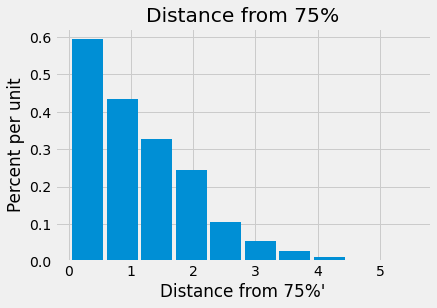

In [164]:
# Empirical distribution of test statistic
pd.DataFrame({'Distance from 75%': distances}).hist(density=True, rwidth=0.9)
plt.ylabel("Percent per unit")
plt.xlabel("Distance from 75%'")
plt.show()


In [165]:
# 705 of Mendel's 929 plants were purple flowering
# Observed test statistic
observed_distance =  abs(100*(705/929) - 75)
observed_distance

0.8880516684607045

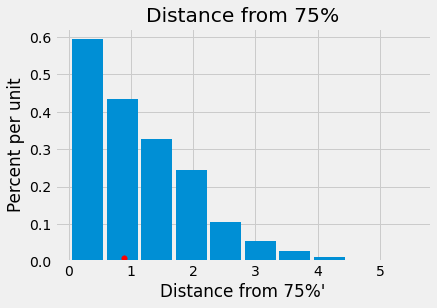

In [167]:
# Don't worry about how the red dot is drawn. It shows the observed test statistic (observed_distance)

pd.DataFrame({'Distance from 75%': distances}).hist(density=True, rwidth=0.9, zorder=1)
plt.ylabel("Percent per unit")
plt.xlabel("Distance from 75%'")

plt.scatter(observed_distance, 0.01, color='red', s=30,  zorder=2);
plt.show()

In [168]:
# P-value. P-value is quite high. So we don't have any evidence to reject the null hypothesis
sum(distances >= observed_distance) / 10000

0.542